In [1]:
%matplotlib inline
import os
import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import re

import torch

from IPython.display import display, Image

import pandas as pd

import numpy as np

In [2]:
import sys
sys.path.append('../')
from output_utils import *

In [6]:
runs = getruns('../Laborieux-Arch/')

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

In [7]:
runsdf = pd.DataFrame(runs)
runsdf.sort_values('dir', ascending=False)[['task', 'model', 'test', 'train', 'softmax', 'loss', 'load_path_convert', 'competitiontype', 'inhibitstrength', 'lat_constraints', 'dir']]

,task,model,test,train,softmax,loss,load_path_convert,competitiontype,inhibitstrength,lat_constraints,dir
43,CIFAR10,CNN,74.03,73.34,False,mse,,none,0.00,[],../Laborieux-Arch/results/EP/mse/2023-08-03/14...
42,CIFAR10,LateralCNN,10.00,10.00,False,mse,,none,0.00,[],../Laborieux-Arch/results/EP/mse/2023-08-03/06...
41,CIFAR10,LateralCNN,10.00,10.00,False,mse,,none,0.00,[],../Laborieux-Arch/results/EP/mse/2023-08-03/06...
40,CIFAR10,LateralCNN,10.00,10.00,False,mse,,none,0.00,[],../Laborieux-Arch/results/EP/mse/2023-08-03/06...
39,CIFAR10,LateralCNN,10.00,10.00,False,mse,,none,0.00,[],../Laborieux-Arch/results/EP/mse/2023-08-03/05...
38,CIFAR10,LateralCNN,10.00,10.00,False,mse,,none,0.00,[],../Laborieux-Arch/results/EP/mse/2023-08-03/05...
37,CIFAR10,LateralCNN,10.00,10.00,False,mse,,none,0.00,[],../Laborieux-Arch/results/EP/mse/2023-08-03/04...
36,CIFAR10,LateralCNN,10.00,10.00,False,mse,,none,0.00,[],../Laborieux-Arch/results/EP/mse/2023-08-03/04...
35,CIFAR10,LateralCNN,10.00,10.00,False,mse,,none,0.00,[],../Laborieux-Arch/results/EP/mse/2023-08-03/03...
34,CIFAR10,LateralCNN,10.00,10.00,False,mse,,none,0.00,[],../Laborieux-Arch/results/EP/mse/2023-08-03/03...


In [6]:
subset = np.logical_or(runsdf['model'] != 'LatSoftCNN',
                       np.logical_and(runsdf['competitiontype'] == 'feature_inner_products',
                                      runsdf['inhibitstrength'] == 1.0,
                                      np.array(list(map(lambda x: len(x) > 0,runsdf['lat_constraints']))) == 0)
                      )
avgdf = runsdf[subset].groupby(['model', 'softmax', 'loss'], as_index=False)
avgdf = avgdf[['model', 'softmax', 'loss', 'train', 'test', 'inhibitstrength']]
avgdf = avgdf.mean()
avgdf['model'] = avgdf['model'] + ' softmax='+np.vectorize(str)(avgdf['softmax']) + ' (' + avgdf['loss'] + ')'
avgdf.sort_values('test', ascending=False)

,model,loss,softmax,train,test,inhibitstrength
0,CNN softmax=False (mse),mse,False,60.08,53.09,0.00
1,CNN softmax=True (cel),cel,True,54.11,51.73,0.00


(85.0, 100.0)

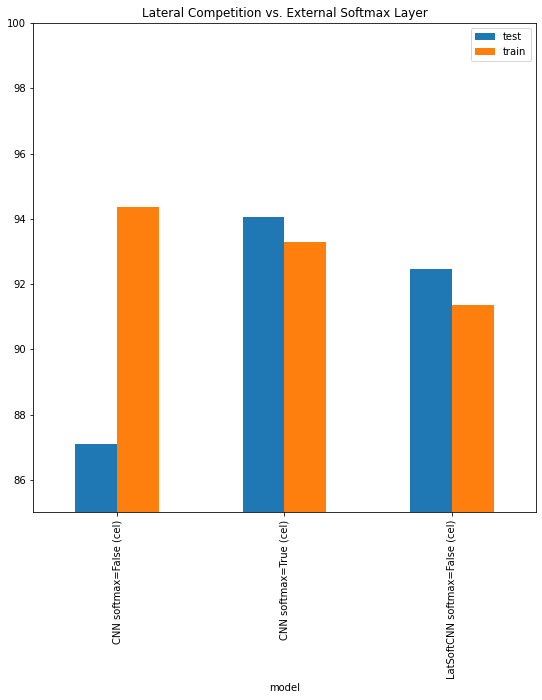

In [29]:
avgdf[avgdf['loss'] == 'cel'].plot.bar('model', ['test', 'train'], figsize = (9,9))
plt.gca().set_title('Lateral Competition vs. External Softmax Layer')
plt.ylim(85, 100)
# plt.savefig('LatSoft_CNN_CNN--softmax_test_and_train_cel.png')

(85.0, 100.0)

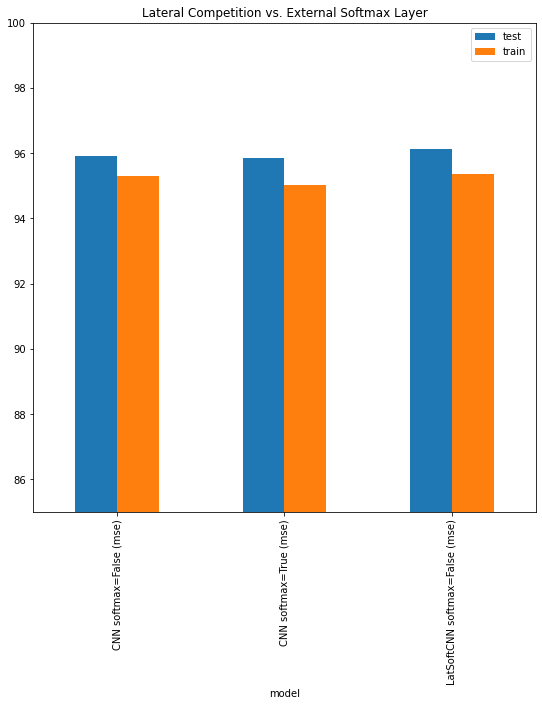

In [30]:
avgdf[avgdf['loss'] == 'mse'].plot.bar('model', ['test', 'train'], figsize = (9,9))
plt.gca().set_title('Lateral Competition vs. External Softmax Layer')
plt.ylim(85, 100)
# plt.savefig('LatSoft_CNN_CNN--softmax_test_and_train_mse.png')

In [73]:
path = 'results/EP/cel/2023-07-18/10-31-15_gpu0/'
model = torch.load(path + 'model.pt')

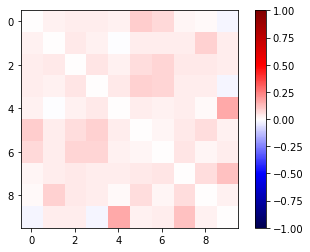

In [59]:
plt.imshow(model.lat_syn[-1].weight.data.cpu(), vmin=-1, vmax=1, cmap='seismic')
plt.colorbar()

In [20]:
path2 = 'results/EP/mse/2023-07-18/14-53-22_gpu1/'
model2 = torch.load(path + 'model.pt')

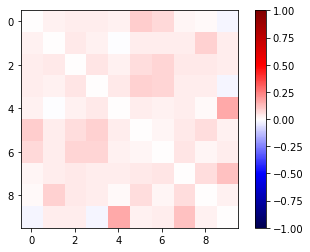

In [21]:
plt.imshow(model2.lat_syn[-1].weight.data.cpu(), vmin=-1, vmax=1, cmap='seismic')
plt.colorbar()

In [86]:
path3 = 'results/EP/cel/2023-07-18/10-34-55_gpu1/'
model3 = torch.load(path3 + 'model.pt')

torch.Size([10, 2304])


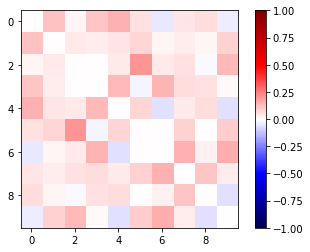

In [87]:
features = model3.synapses[-1].weight.data.cpu()
print(features.size())
latcon = torch.zeros((10,10))
for i in range(features.size(0)):
    latcon[i,:] = torch.sum(features[i] * features[:], dim=1) #, aspect=100, cmap='seismic', vmin=-1e-1, vmax=1e-1)
    latcon[i,i] = 0

plt.imshow(-latcon, cmap='seismic', vmin=-1, vmax=1)
plt.colorbar()

torch.Size([10, 2304])


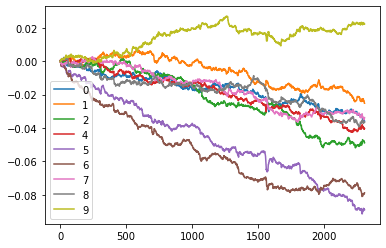

In [46]:
features = model.synapses[-1].weight.data.cpu()
print(features.size())
j = 3
for i in range(features.size(0)):
    if i != j:
        plt.plot(np.cumsum(features[i] * features[j]).T, label=i)#, aspect=100, cmap='seismic', vmin=-1e-1, vmax=1e-1)

plt.legend()

In [90]:
path = 'results/EP/cel/2023-07-18/17-21-56_gpu0/'
model = torch.load(path + 'model.pt')

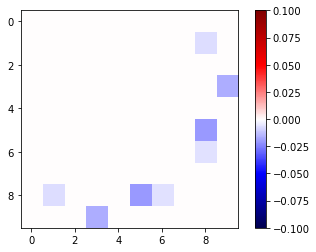

In [78]:
plt.imshow(model.lat_syn[-1].weight.data.cpu(), vmin=-1e-1, vmax=1e-1, cmap='seismic')
plt.colorbar()

torch.Size([10, 2304])


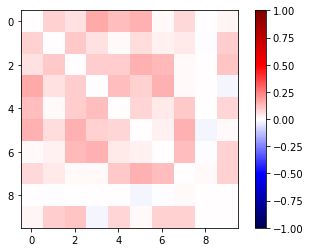

In [88]:
features = model.synapses[-1].weight.data.cpu()
print(features.size())
latcon = torch.zeros((10,10))
for i in range(features.size(0)):
    latcon[i,:] = torch.sum(features[i] * features[:], dim=1) #, aspect=100, cmap='seismic', vmin=-1e-1, vmax=1e-1)
    latcon[i,i] = 0

plt.imshow(-latcon, cmap='seismic', vmin=-1, vmax=1)
plt.colorbar()